# Classification

In this session, we use chapter 3 of [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems by Aurélien Géron ](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow-ebook/dp/B07XGF2G87/)

In this example, I want to explore some details related to classification, such as analyzing the errors.

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

**MNIST**

In this chapter, we will be using the MNIST dataset (Modified National Institute of Standards and Technology database), 

- which is a set of <font color='blue'> 70,000 small
images of digits handwritten</font>  by <font color='blue'> high  school students </font>  and <font color='blue'> employees of the US Census Bureau</font>.

- Each image is labeled with the digit it represents. 

- This set has been studied so much that it is often called the <font color='blue'> "Hello World"</font> of Machine Learning

Scikit-Learn provides many helper functions to download popular datasets. MNIST is one of them. The following code fetches the MNIST dataset:

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

Datasets loaded by Scikit-Learn generally have a similar dictionary structure including:
- A `DESCR` key describing the dataset
- A `data` key containing an array with one row per instance and one column per feature
- A `target` key containing an array with the labels

Let’s look at these arrays:

In [3]:
X, y = mnist["data"], mnist["target"]

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

There are 70,000 images, and <font color='blue'> each image</font> has <font color='blue'> 784 features</font>. This is because <font color='blue'> each image</font> is <font color='blue'> 28×28 pixels</font>, and <font color='blue'> each feature</font> simply represents one pixel’s intensity, <font color='blue'> from 0 (white) to 255 (black) </font>.

Let’s take a peek at one digit from the dataset:

(-0.5, 27.5, 27.5, -0.5)

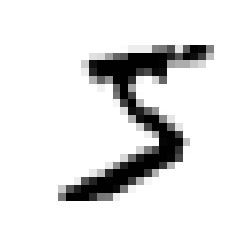

In [6]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
#plt.imshow(some_digit_image)
plt.axis("off")
#some_digit_image

This looks like a 5, and indeed that’s what the label tells us:

In [7]:
y[0]

'5'

Note that the label is a string. We prefer numbers, so let’s cast y to integers:

In [8]:
y = y.astype(np.uint8)
#"np.uint8": 8-bit unsigned integer (0 to 255).
#astype(...): Copy of the array, cast to a specified type.

A few more images from the MNIST dataset:
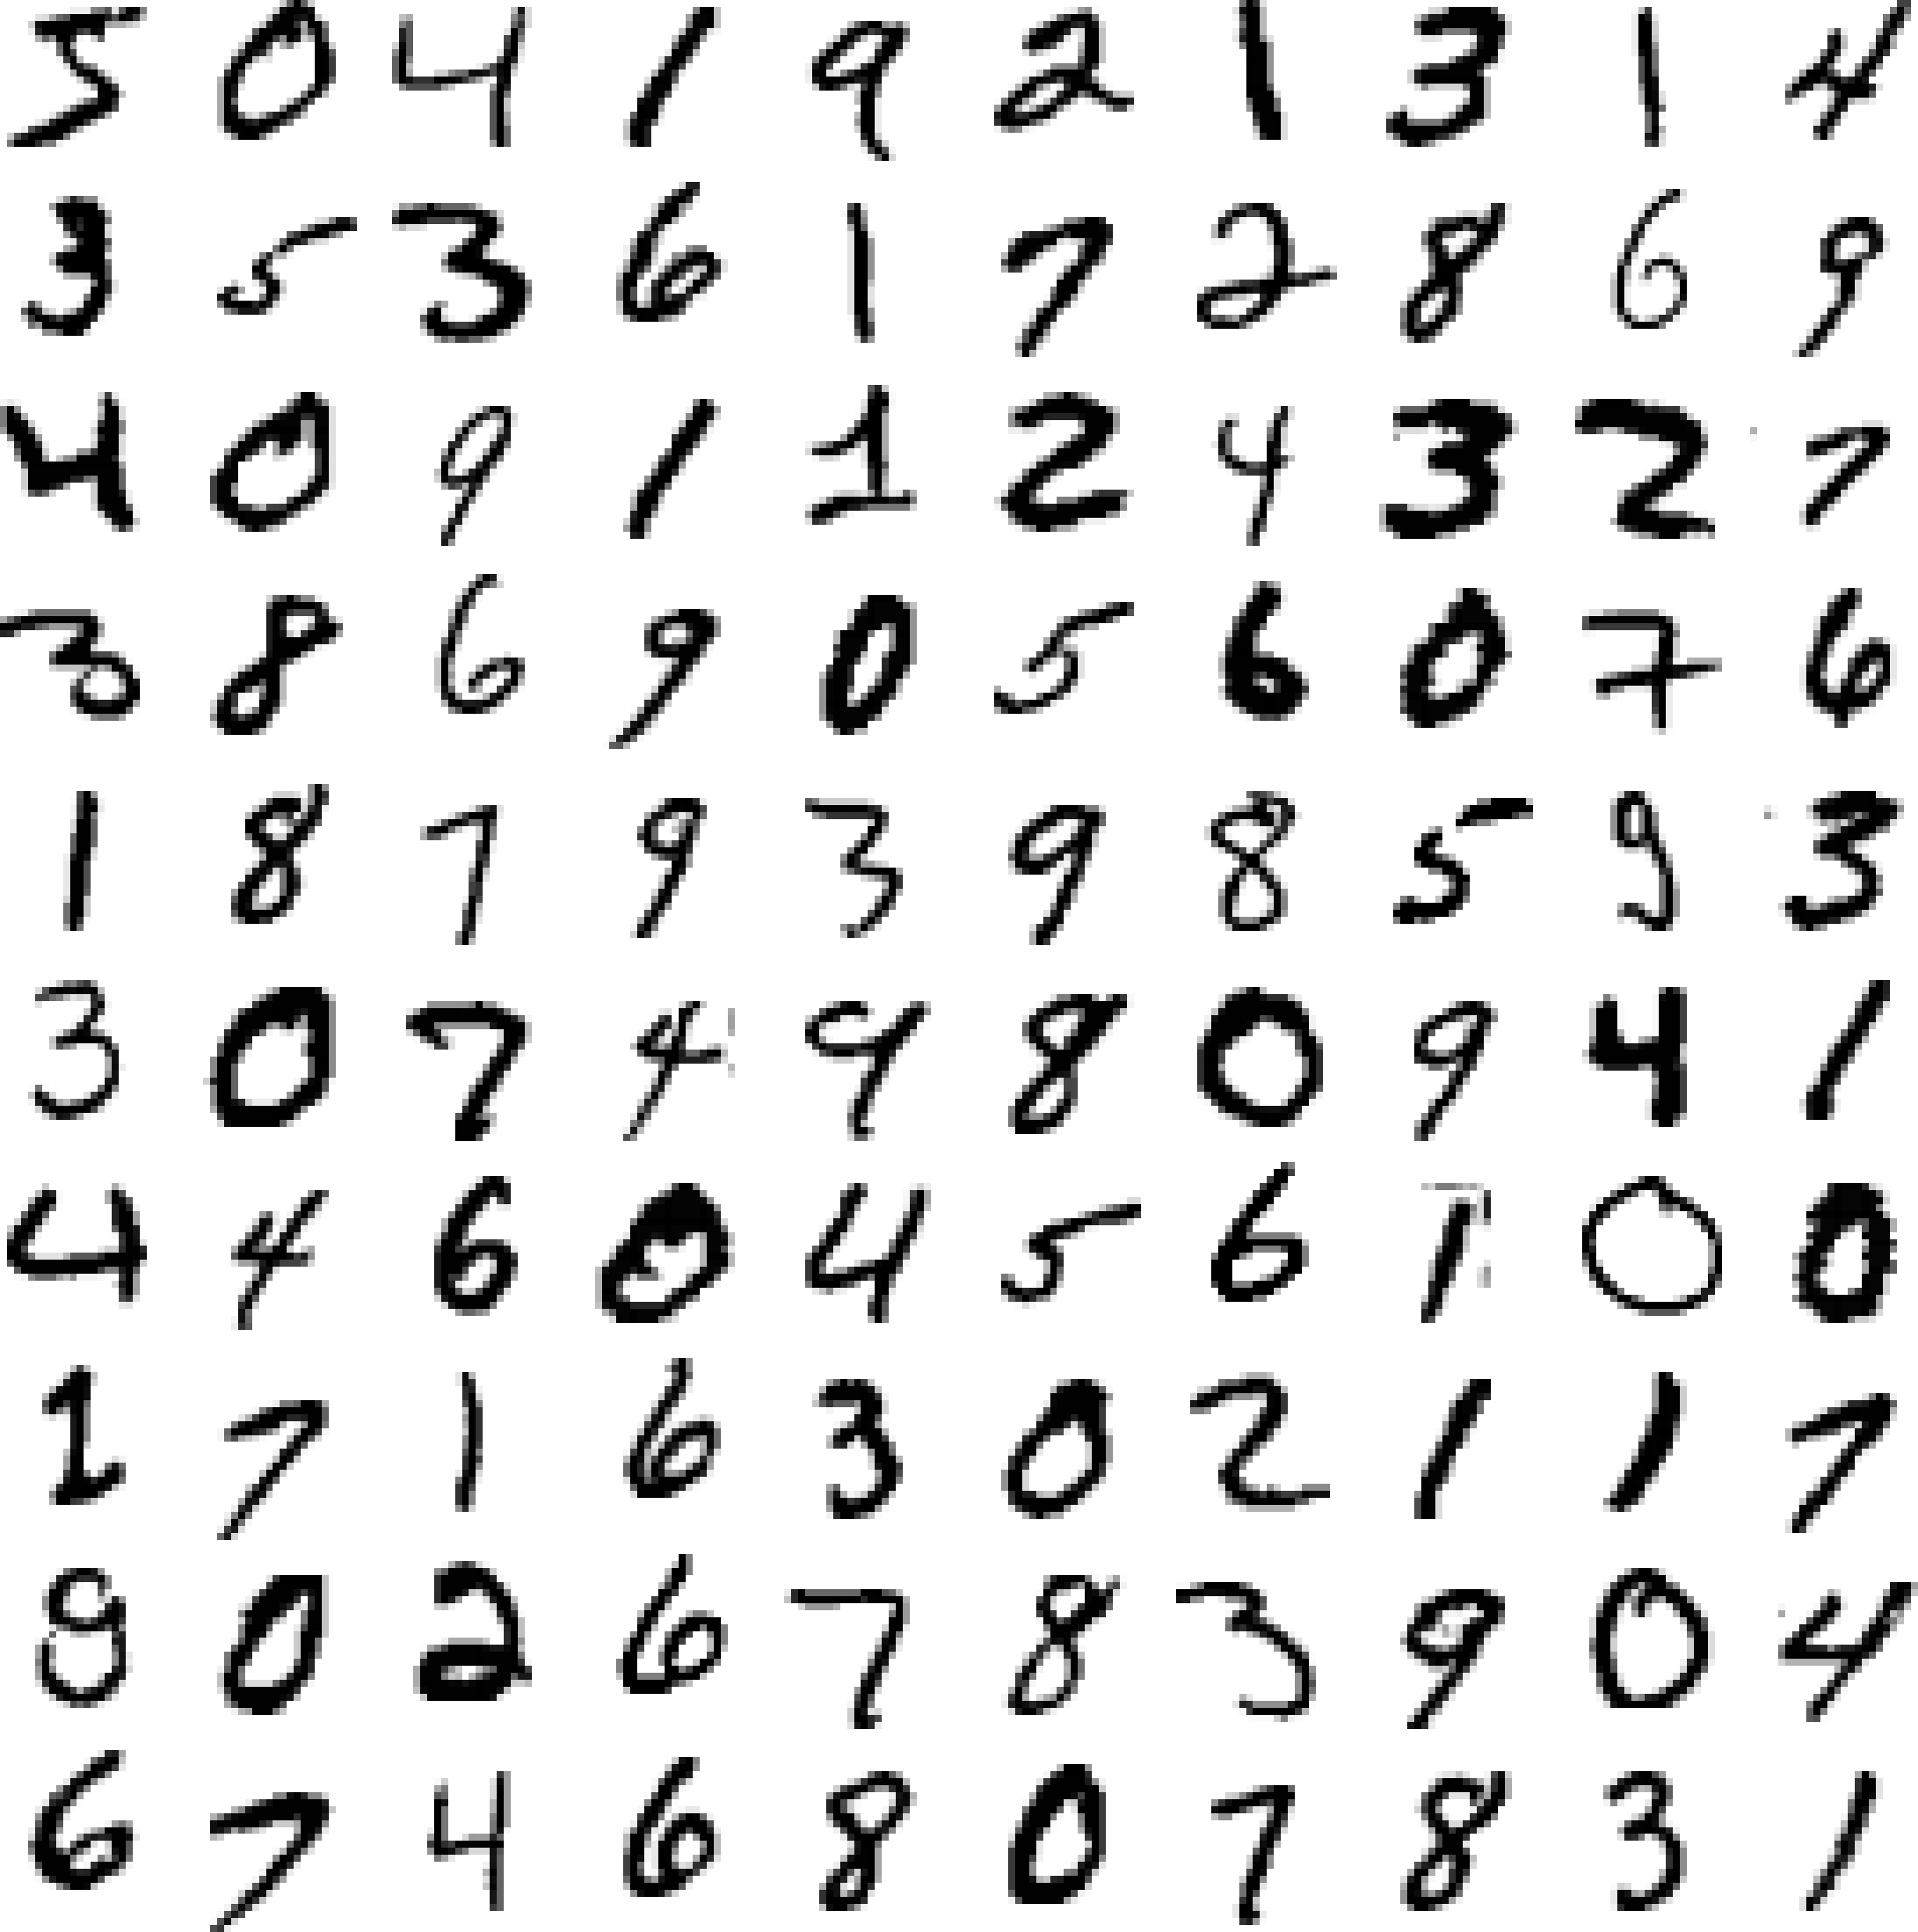

create a test set?


The MNIST dataset is actually already split into a <font color='blue'> training set (the first 60,000 images)</font> and a <font color='blue'> test set (the last 10,000 images)</font>:

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

**Training a Binary Classifier**

Let’s simplify the problem for now and only try to identify one digit—for example, the number 5. This "5-detector" will be an example of a <font color='blue'> binary classifier</font>, capable of <font color='blue'> distinguishing between just two classes</font>, <font color='red'> 5 and not-5</font>. Let’s create the target vectors for this classification task:

In [10]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
y_train_5

array([ True, False, False, ...,  True, False, False])

**Choosing a classifier:**

A good place to start is with a Stochastic Gradient Descent (SGD) classifier, using Scikit-Learn’s `SGDClassifier` class:

In [12]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

>The `SGDClassifier` relies on randomness during training (hence
the name "stochastic"). If you want reproducible results, you
should set the `random_state` parameter.

Now you can use it to detect images of the number 5:

In [13]:
sgd_clf.predict([some_digit])
#sgd_clf.predict([X[1]])

array([ True])

The classifier guesses that this image represents a 5 (`True`). Looks like it guessed right
in this particular case! Now, let’s evaluate this model’s performance.

**Performance Measures**

<font color='blue'> Evaluating a classifier</font> is often significantly <font color='blue'> trickier</font> than <font color='blue'> evaluating a regressor</font>, so we will spend a large part of this chapter on this topic.

**Measuring Accuracy Using Cross-Validation**

Let’s use the `cross_val_score()` function to evaluate your `SGDClassifier` model using K-fold cross-validation, with three folds:

In [14]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

Wow! Above 95% <font color='blue'> accuracy (ratio of correct predictions) </font> on all cross-validation folds.

***
The definition of accuracy:

$$\text{Accuracy}=\frac{\text{Number of Correct predictions}}{\text{Total number of predictions made}}$$
***

This looks amazing, doesn’t it? Well, before you get too excited, let’s look at a <font color='blue'> very dumb classifier</font> that just classifies every single image in the <font color='blue'> "not-5" class</font>:

In [15]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

To see how `Never5Classifier` class works please see the following webpage:
https://github.com/ageron/handson-ml/issues/497 

At this page (github  ageron/handson-ml issue:Never5Classifier is not making sense #497), it says:
>So basically what we are doing is we are making an array of `len(x)` of `False` and `y_train_5` will have `True` where ever there is a 5. So `False` from `len(x)` and `y_train_5` will match resulting in about 90% accuracy. And when `False` from `len(x)` and a True from `y_train_5` results in a mismatch.

In [16]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

That’s right, it has over 90% accuracy! This is simply because only about 10% of the images are 5s, so if you always guess that an image is not a 5, you will be right about 90% of the time.

([<matplotlib.axis.XTick at 0x7f9fee146550>,
 <a list of 10 Text xticklabel objects>)

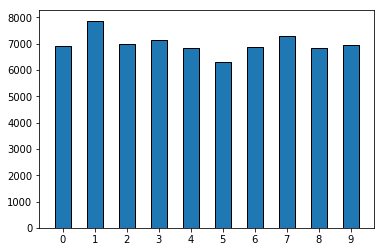

In [17]:
plt.hist(y, histtype='bar',bins=[0,1,2,3,4,5,6,7,8,9,10],ec='black',rwidth=0.5,align='left')
plt.xticks(np.arange(0,10,1))

This demonstrates why <font color='blue'> accuracy</font> is generally <font color='blue'> not the preferred performance measure</font> for classifiers, especially when you are dealing with <font color='blue'> skewed datasets</font> (i.e., when some classes are much more frequent than others).

**Confusion Matrix**

A much better way to evaluate the performance of a classifier is to look at the confusion matrix. <font color='blue'> The general idea is to count the number of times instances of class A are classified as class B</font>. For example, to know the number of times the classifier confused images of 5s with 3s, you would look in the 5th row and 3rd column of the confusion
matrix.

**An example of Confusion matrix for a binary classifier (in scikit-learn):**  
 https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/  
 https://www.youtube.com/watch?reload=9&v=8Oog7TXHvFY
    
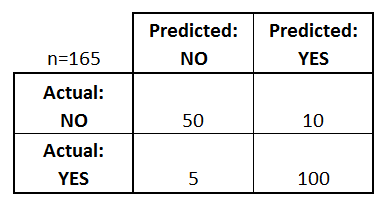

- There are two possible predicted classes: "yes" and "no". If we were predicting the presence of a disease, for example, "yes" would mean they have the disease, and "no" would mean they don't have the disease.

- The classifier made a total of 165 predictions (e.g., 165 patients were being tested for the presence of that disease).

- Out of those 165 cases, the classifier predicted "yes" 110 times, and "no" 55 times.

- In reality, 105 patients in the sample have the disease, and 60 patients do not.

**Definition of the most basic terms:**

- **true positives (TP):** These are cases in which we predicted yes (they have the disease), and they do have the disease.
- **true negatives (TN):** We predicted no, and they don't have the disease.
- **false positives (FP):** We predicted yes, but they don't actually have the disease. (Also known as a "Type I error.")
- **false negatives (FN):** We predicted no, but they actually do have the disease. (Also known as a "Type II error.")
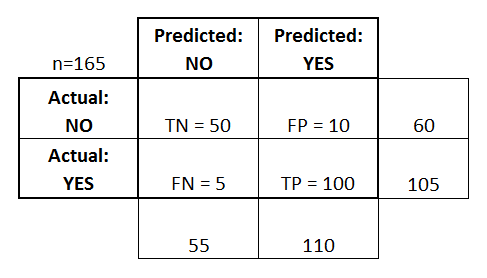

list of rates that are often computed from a confusion matrix for a binary classifier:

- **Accuracy:** Overall, how often is the classifier correct?
  - (TP+TN)/total = (100+50)/165 = 0.91
- **Misclassification Rate:** Overall, how often is it wrong?
  - (FP+FN)/total = (10+5)/165 = 0.09
  - equivalent to 1 minus Accuracy
  - also known as "Error Rate"
- **True Positive Rate:** When it's actually yes, how often does it predict yes?
  - TP/actual yes = 100/105 = 0.95; recall $=\frac{T P}{T P+F N}$ (the book fomula)
  - also known as "Sensitivity" or **"Recall"**
- **Precision:** When it predicts yes, how often is it correct?
  - TP/predicted yes = 100/110 = 0.91;  precision $=\frac{T P}{T P+F P}$   (the book formula)






To compute the <font color='blue'> confusion matrix</font>, you first need to have a <font color='blue'> set of predictions</font>, so they can be <font color='blue'> compared</font> to the <font color='blue'> actual targets</font>. You could make predictions on the test set, but let’s keep it untouched for now (remember that you want to use the test set only at the
very end of your project, once you have a classifier that you are ready to launch).
Instead, you can use the `cross_val_predict()` function:

In [19]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

Just like the `cross_val_score()` function, `cross_val_predict()` performs <font color='blue'> K-fold cross-validation</font>, but <font color='blue'> instead</font> of returning the evaluation <font color='blue'> scores</font>, it returns the <font color='blue'> predictions made on each test fold</font>. This means that you get a clean prediction for each
instance in the training set ("clean" meaning that the prediction is made by a model that never saw the data during training).

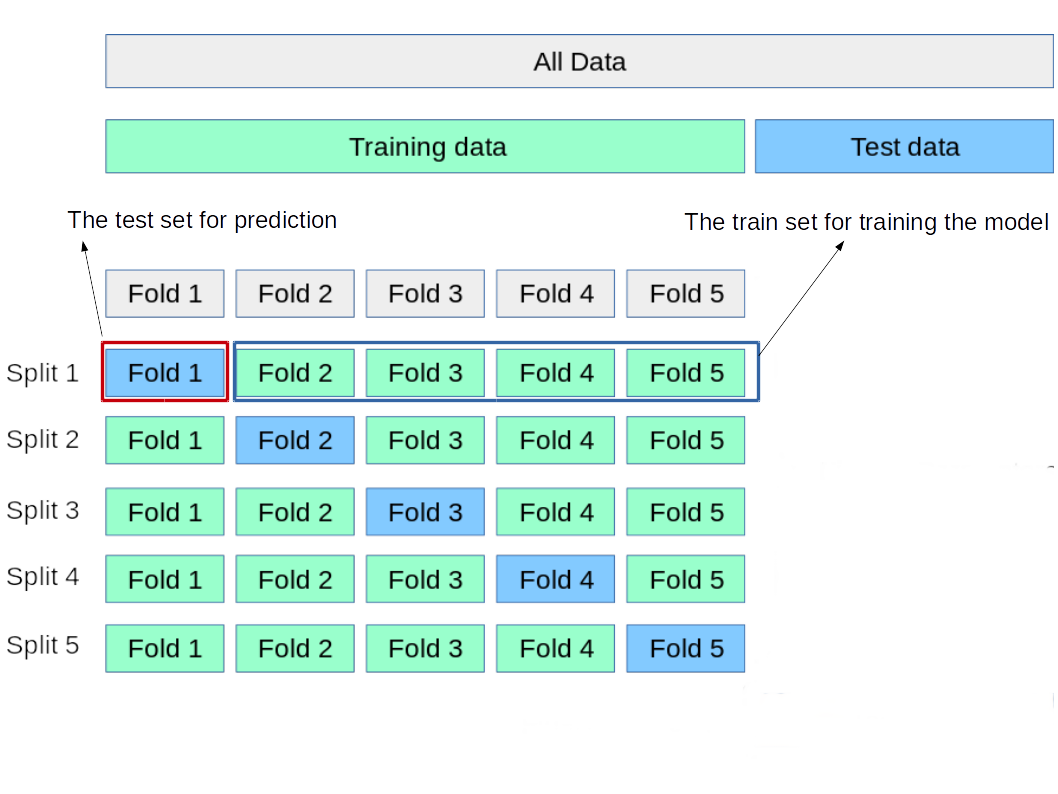

get the confusion matrix using the `confusion_matrix()` function.
Just pass it the target classes (`y_train_5`) and the predicted classes (`y_train_pred`):

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [29]:
53892+687+1891+3530 #----> total data in train set

60000

In [30]:
53892+687 # ----> total non-5s in train set

54579

In [31]:
1891+3530  # ----> total 5s in trian set

5421

An illustrated confusion matrix:
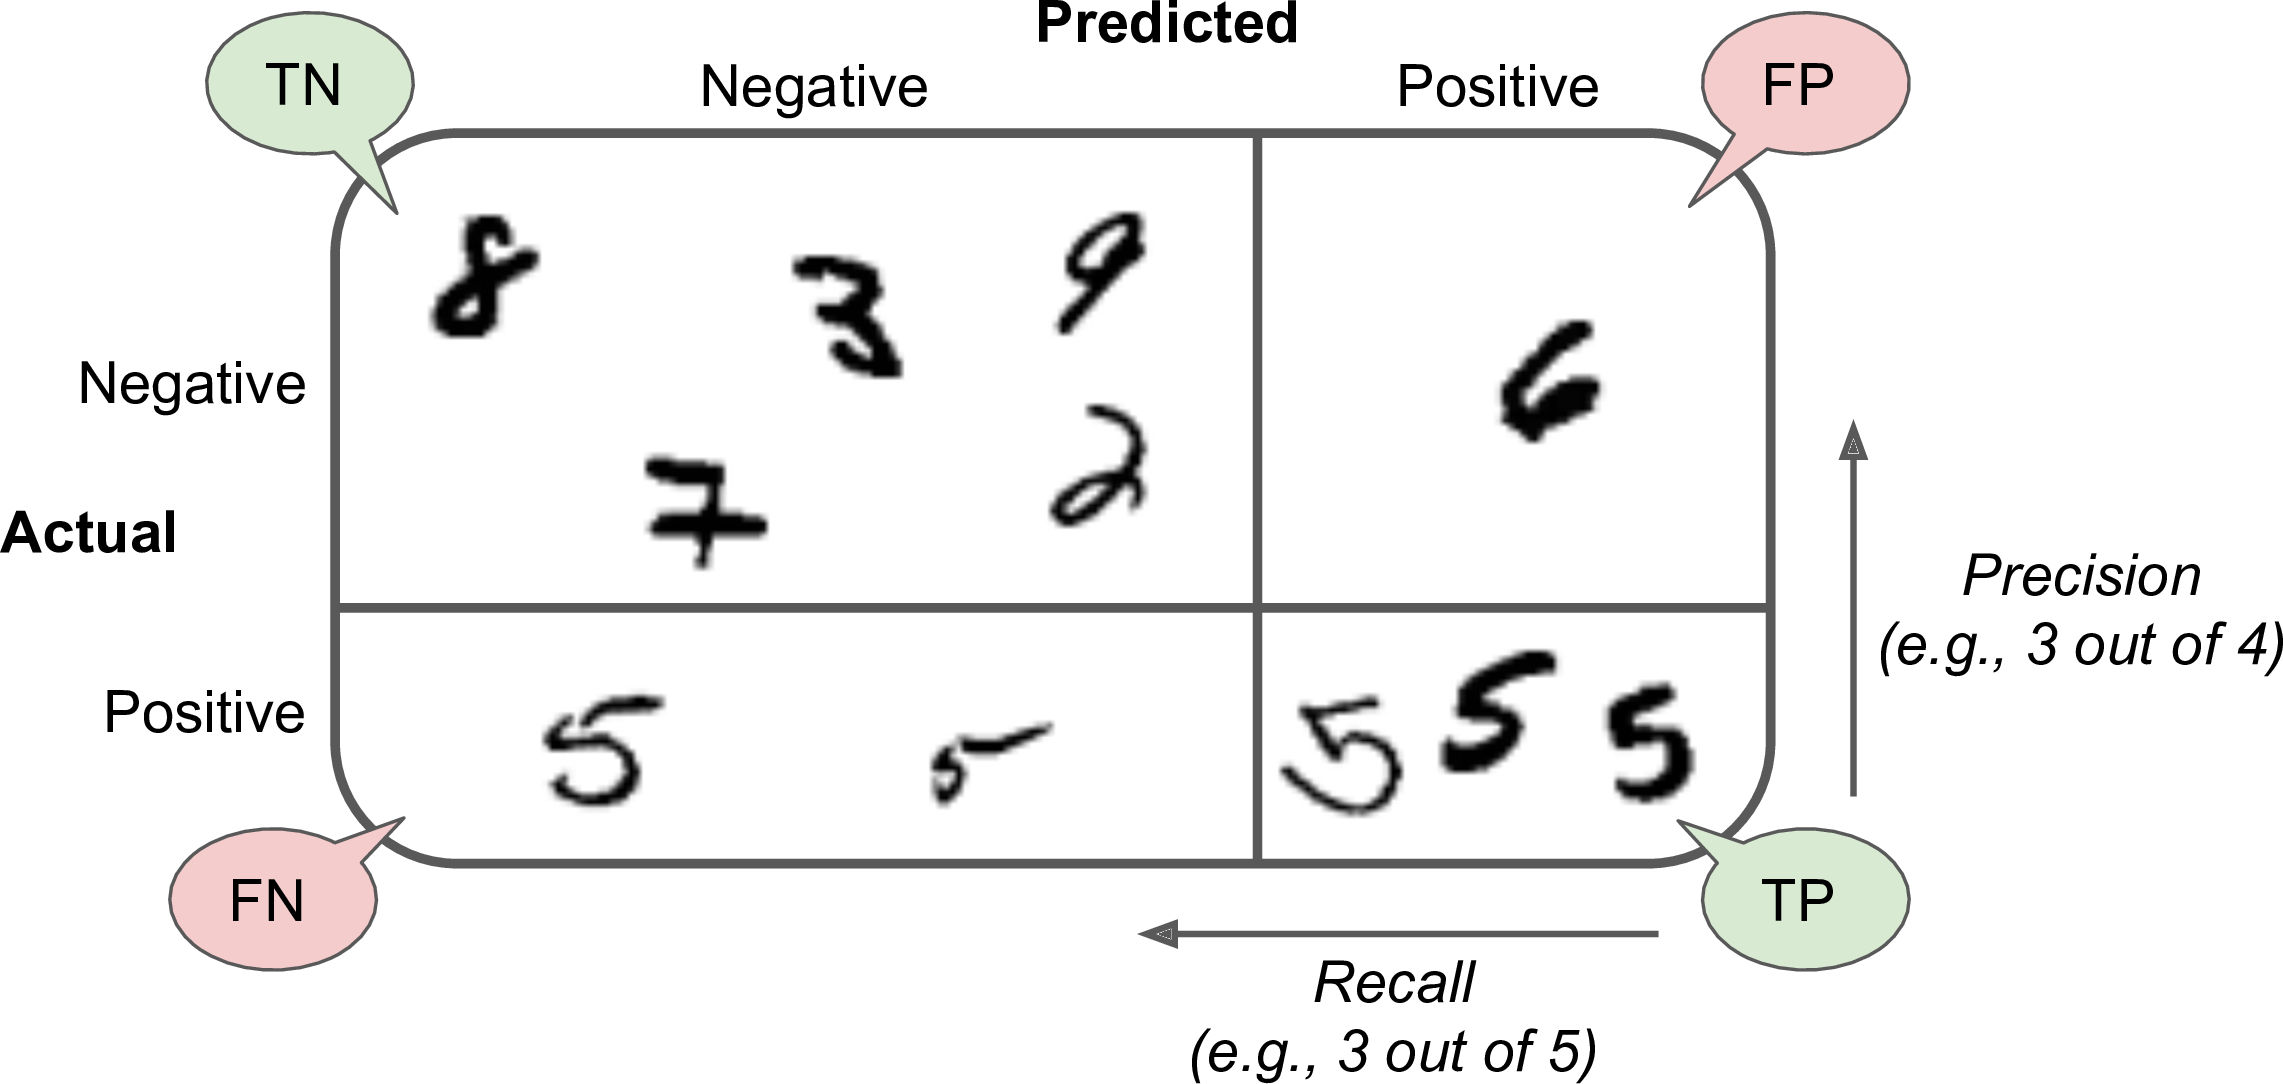


- Each row in a confusion matrix represents an actual class, 
- while each column represents a predicted class. 
- The <font color='blue'> first row</font> of this matrix considers <font color='blue'> non-5 images </font> (the <font color='blue'> negative class</font>): 53892 of them were <font color='blue'> correctly classified as non-5s</font> (they are called <font color='blue'> true negatives</font>), while the remaining 687 were <font color='blue'> wrongly classified as 5s</font> (<font color='blue'> false positives</font>).
- The <font color='blue'> second row</font> considers the <font color='blue'> images of 5s </font> (the <font color='blue'> positive class</font>): 1891 were <font color='blue'> wrongly classified as non-5s</font> (<font color='blue'> false negatives</font>), while the remaining 3530 were <font color='blue'> correctly classified
as 5s</font> (<font color='blue'> true positives</font>). 

A <font color='blue'> perfect classifier</font> would have only 
<font color='blue'> true positives</font> and 
<font color='blue'> true negatives</font>, so its confusion matrix would have nonzero values only on its main diagonal
(top left to bottom right):

In [21]:
y_train_perfect_predictions = y_train_5 # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

**Precision and Recall**

Two interesting metrics from the confusion matrix:

- the <font color='blue'> accuracy of the positive predictions</font>;
this is called the <font color='blue'> precision</font> of the classifier:

  precision $=\frac{T P}{T P+F P}$


- another metric named <font color='blue'> recall, also</font> called <font color='blue'> sensitivity or true positive rate (TPR)</font>: this is the <font color='blue'> ratio of positive instances that are correctly detected </font>by the classifier:

  recall $=\frac{T P}{T P+F N}$
  
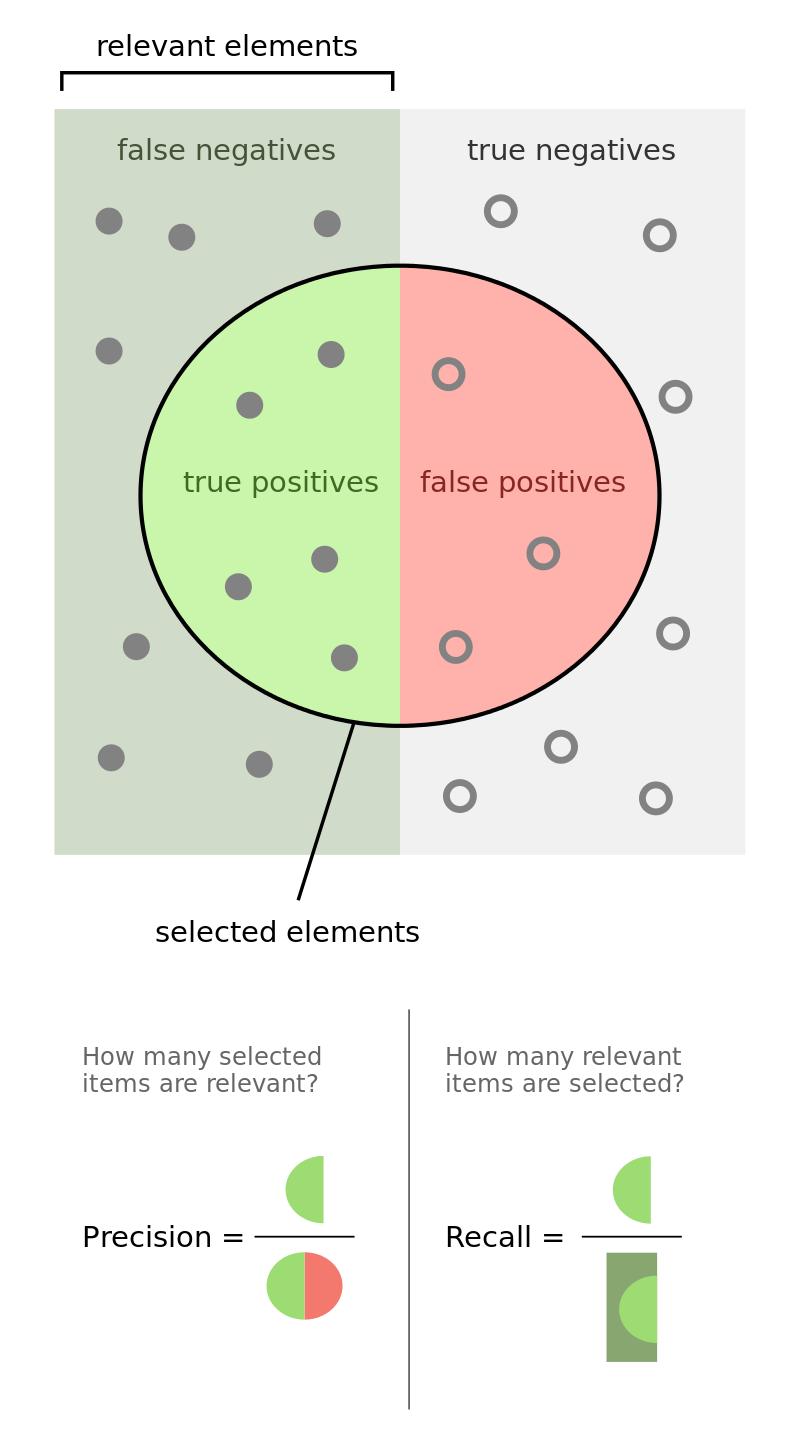

(https://en.wikipedia.org/wiki/Precision_and_recall)

Scikit-Learn provides several functions to compute classifier metrics, including precision
and recall:

In [22]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred) # == 3530 / (3530 + 687)

0.8370879772350012

In [23]:
recall_score(y_train_5, y_train_pred) # == 3530 / (3530 + 1891)

0.6511713705958311

Now your 5-detector does not look as shiny as it did when you looked at its accuracy.
When it <font color='blue'> claims an image represents a 5</font>, it is <font color='blue'> correct only 83.7% of the time</font>. Moreover, it only <font color='blue'> detects 65.1% of the 5s</font>.

It is often convenient to combine precision and recall into a single metric called the  $F_1$ *score*, in particular if you need a simple way to compare two classifiers. The $F_1$ score is the <font color='blue'> harmonic mean of precision and recall</font>.
Whereas the regular mean treats all values equally, the <font color='blue'> harmonic mean</font> gives <font color='blue'> much more weight to low values</font>.
As a result, the classifier will only get a high F1 score if both recall and precision are
high.
$$F_{1}=\frac{2}{\frac{1}{\text { precision }}+\frac{1}{\text { recall }}}=2 \times \frac{\text { precision } \times \text { recall }}{\text { precision }+\text { recall }}=\frac{T P}{T P+\frac{F N+F P}{2}}$$


***
The harmonic mean H of the positive real numbers ${\displaystyle x_{1},x_{2},\ldots ,x_{n}}$ is defined to be 
$$H=\frac{n}{\frac{1}{x_{1}}+\frac{1}{x_{2}}+\cdots+\frac{1}{x_{n}}}=\frac{n}{\sum_{i=1}^{n} \frac{1}{x_{i}}}=\left(\frac{\sum_{i=1}^{n} x_{i}^{-1}}{n}\right)^{-1}$$
***

To compute the $F_1$ *score*, simply call the `f1_score()` function:

In [24]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

The $F_1$ score favors classifiers that have similar precision and recall. This is not always what you want: in some contexts you mostly <font color='blue'> care about precision</font>, and in other contexts you really <font color='blue'> care about recall</font>. 

For example, if you trained a classifier to <font color='blue'> detect videos</font> that are <font color='blue'> safe for kids</font>, you would probably prefer a classifier that <font color='blue'> rejects many good videos (**low recall**)</font> but <font color='blue'> keeps only safe ones (**high precision**)</font>, rather than a classifier that has a much higher recall but lets a few really bad videos show up in your
product. 

On the other hand, suppose you train a classifier to <font color='blue'> detect shoplifters on surveillance images</font>: 
it is probably fine if your classifier has <font color='blue'> only 30% precision as long as it has 99% recall </font> (sure, the security guards will get a few false alerts, but almost all shoplifters will get caught).

Unfortunately, you can't have it both ways: <font color='blue'> increasing precision reduces recall, and vice versa</font>. This is called the <font color='blue'>  precision/recall tradeoff</font>.


**Precision/Recall Tradeoff**

To understand this tradeoff, let’s look at <font color='blue'> how the `SGDClassifier` makes its classification decisions</font>. <font color='blue'> For each instance, it computes a **score based on a decision function**</font>, and if that <font color='blue'> score </font> is <font color='blue'> greater</font> than <font color='blue'> a threshold</font>, it assigns the instance to the <font color='blue'> positive class</font>, or <font color='blue'> else</font> it assigns it to the <font color='blue'> negative class</font>.


Decision threshold and precision/recall tradeoff:
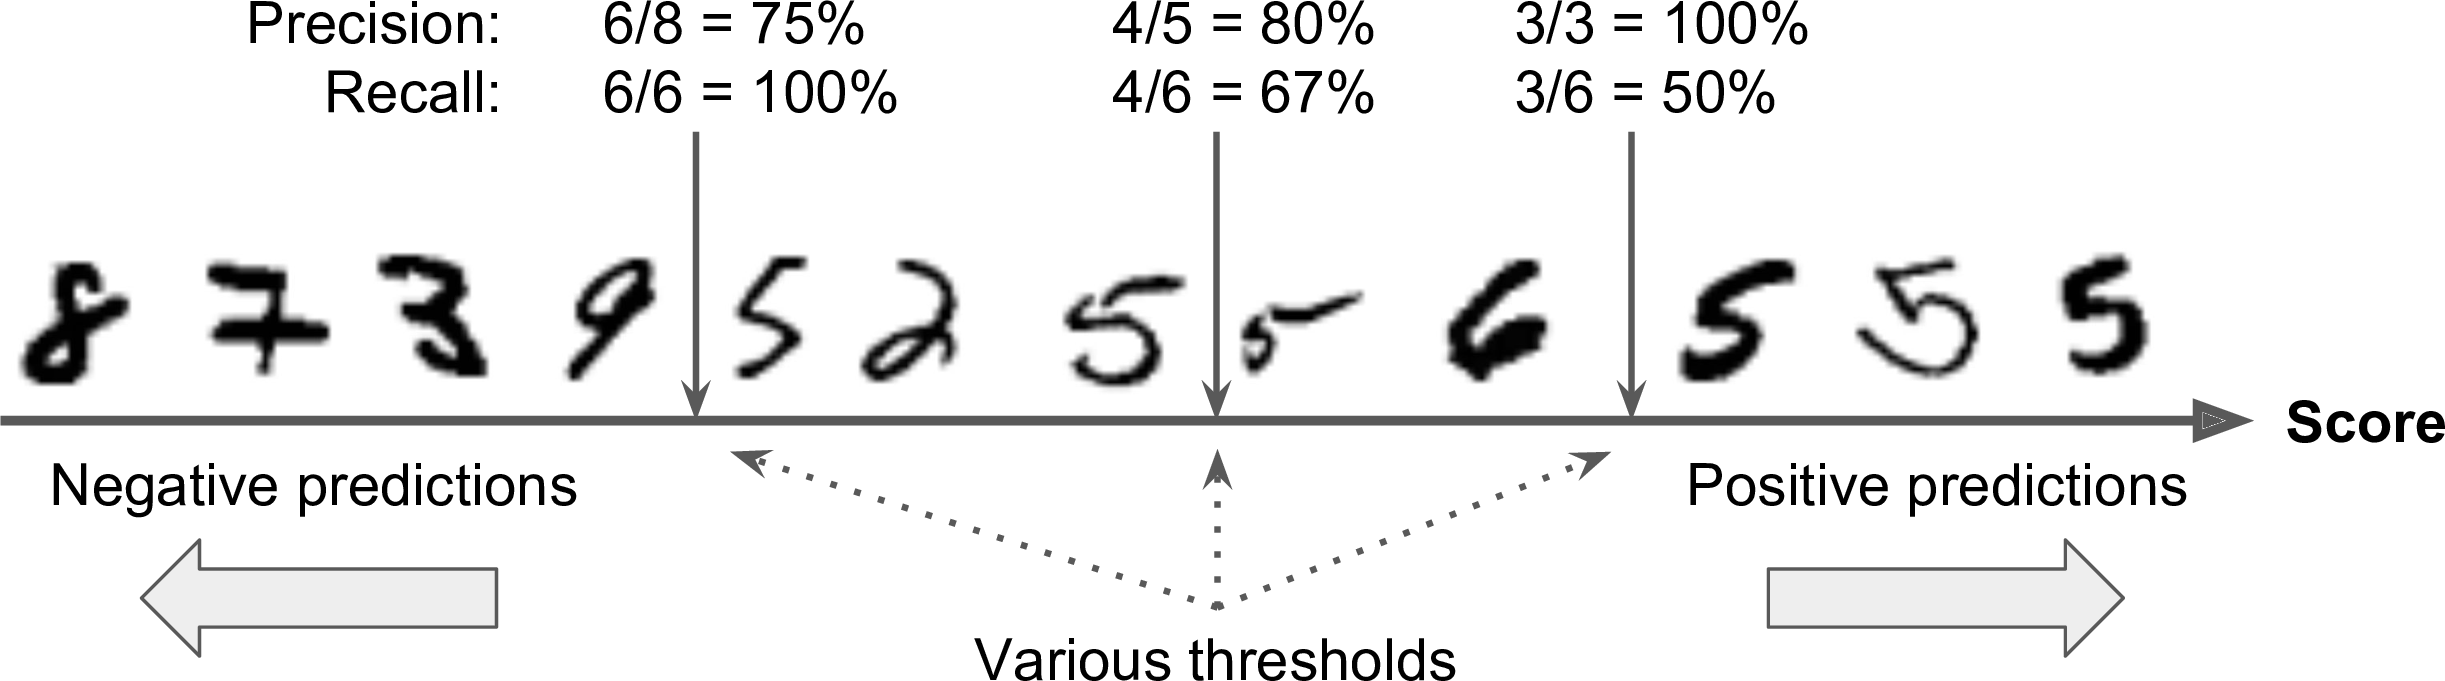

Scikit-Learn does not let you set the threshold directly, but it does give you access to the decision scores that it uses to make predictions. Instead of calling the classifier’s `predict()` method, you can call its `decision_function()` method, which returns a
score for each instance, and then make predictions based on those scores using any
threshold you want:

In [25]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [26]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

The `SGDClassifier` uses a threshold equal to 0, so the previous code returns the same result as the `predict()` method (i.e., `True`). Let’s raise the threshold:

In [27]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

This confirms that raising the threshold decreases recall. The image actually represents
a 5, and the classifier detects it when the threshold is 0, but it misses it when the
threshold is increased to 8,000.

Now how do you decide which threshold to use? For this you will first need to get the scores of all instances in the training set using the `cross_val_predict()` function again, but this time specifying that you want it to return <font color='blue'> decision scores instead of
predictions</font>:

In [28]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

Now with these scores you can compute precision and recall for all possible thresholds using the `precision_recall_curve()` function:

In [29]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Finally, you can plot precision and recall as functions of the threshold value using
Matplotlib:

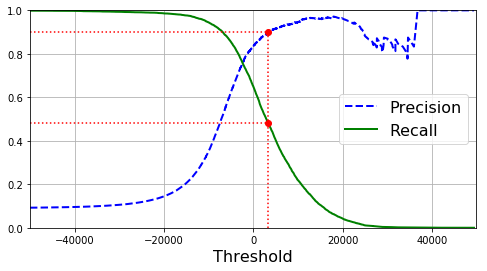

In [30]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown

>You may wonder why the precision curve is bumpier than the recall
curve. The reason is that precision may sometimes go
down when you raise the threshold (although in general it will go
up). To understand why, look back at Figure (Decision threshold and precision/recall tradeoff) and notice what
happens when you start from the central threshold and move it just
one digit to the right: precision goes from 4/5 (80%) down to 3/4
(75%). On the other hand, recall can only go down when the threshold
is increased, which explains why its curve looks smooth.

Another way to select a good precision/recall tradeoff is to plot precision directly
against recall:

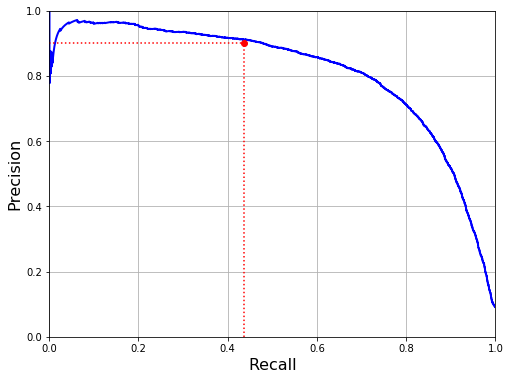

In [31]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")
plt.show()

You can see that precision really starts to fall sharply around 80% recall. You will
probably want to select a precision/recall tradeoff just before that drop—for example,
at around 60% recall. But of course the choice depends on your project.

let’s suppose you decide to aim for 90% precision. You look up the first plot and
find that you need to use a threshold of about 3370. To be more precise you can
search for the lowest threshold that gives you at least 90% precision (`np.argmax()`
will give us the first index of the maximum value, which in this case means the first
`True` value):

In [32]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [33]:
np.argmax(precisions >= 0.90)

57075

In [34]:
threshold_90_precision

3370.0194991439557

In [35]:
thresholds[np.argmax(precisions >= 0.90)]

3370.0194991439557

To make predictions (on the training set for now), instead of calling the classifier’s
`predict()` method, you can just run this code:

In [36]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [37]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [38]:
y_train_pred_90

array([False, False, False, ...,  True, False, False])

Let’s check these predictions’ precision and recall:

In [39]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [40]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

**The ROC Curve**

We skip this part of the book!

**Multiclass Classification**

Whereas binary classifiers distinguish between two classes, multiclass classifiers (also called multinomial classifiers) can distinguish between more than two classes.

there are various strategies that you can use to perform multiclass classification using multiple binary classifiers:

- one way to create a system that can classify the digit images into <font color='blue'> 10 classes (from 0 to 9)</font> is to <font color='blue'> train 10 binary classifiers</font>, one for each digit (<font color='blue'> **a 0-detector, a 1-detector, a 2-detector, and so on**</font>). Then when you want <font color='blue'> to classify an image</font>, you get
the <font color='blue'> decision score from each classifier for that image</font> and you <font color='blue'> select the class whose
classifier outputs the highest score</font>. This is called the <font color='blue'> **one-versus-all (OvA) strategy**</font> (also called one-versus-the-rest).

- Another strategy is to <font color='blue'> train a binary classifier for **every pair of digits**: one to distinguish
0s and 1s, another to distinguish 0s and 2s, another for 1s and 2s, and so on</font>.
This is called the <font color='blue'> **one-versus-one (OvO) strategy**</font>. If there are <font color='blue'> N classes</font>, you need to train <font color='blue'> N × (N – 1) / 2 classifiers</font>. For the <font color='blue'> MNIST</font> problem, this means <font color='blue'> training 45 binary classifiers</font>! When you want <font color='blue'> to classify an image, you have to run the image through all 45 classifiers and see **which class wins the most duels**</font>. The <font color='blue'> main advantage of OvO</font> is that each classifier only needs to be trained on the part of the training set for the two classes that it must distinguish.

Some algorithms (such as <font color='blue'> Support Vector Machine classifiers</font>) scale poorly with the size of the training set, so for these algorithms <font color='blue'> OvO is preferred</font> since it is faster to train many classifiers on small training sets than training few classifiers on large
training sets. <font color='blue'> For **most binary classification** algorithms, however, **OvA** is preferred</font>.

<font color='blue'> Scikit-Learn **detects**</font> when you try to use <font color='blue'> a binary classification algorithm for a multiclass classification task</font>, and it <font color='blue'> **automatically** runs **OvA**</font> (except for SVM classifiers for
which it uses OvO). Let’s try this with the SGDClassifier:

In [41]:
sgd_clf.fit(X_train, y_train) # y_train, not y_train_5
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

That was easy! This code trains the SGDClassifier on the training set using the original
target classes from 0 to 9 (y_train), instead of the 5-versus-all target classes
(y_train_5). Then it makes a prediction (a correct one in this case). Under the hood,
<font color='blue'> Scikit-Learn actually trained 10 binary classifiers, got their decision scores for the
image, and selected the class with the **highest score**</font>.
To see that this is indeed the case, you can call the `decision_function()` method.
Instead of returning just one score per instance, it now returns 10 scores, one per
class:

In [42]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

The highest score is indeed the one corresponding to class 3:

In [35]:
np.argmax(some_digit_scores)

3

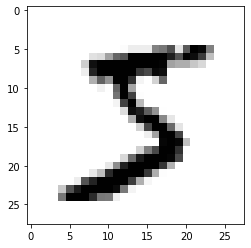

In [36]:
plt.imshow(some_digit.reshape(28,28),cmap = mpl.cm.binary)

In [43]:
some_digit_1=X_train[1]
y_train[1]

0

In [44]:
some_digit_scores = sgd_clf.decision_function([some_digit_1])
some_digit_scores

array([[ 14390.59839396, -36919.31719967,  -9811.47434817,
         -8054.56345089, -21825.25725463, -11313.62371972,
        -23649.39025808, -15986.78463914,  -3798.52944589,
        -10635.46503726]])

In [42]:
np.argmax(some_digit_scores)

0

In [43]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [44]:
sgd_clf.classes_[5]

5

If you want to force ScikitLearn to use one-versus-one or one-versus-all, you can use
the `OneVsOneClassifier` or `OneVsRestClassifier` classes. Simply create an instance
and pass a binary classifier to its constructor. For example, this code creates a multiclass
classifier using the OvO strategy, based on a `SGDClassifier`:

In [37]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([5], dtype=uint8)

In [38]:
len(ovo_clf.estimators_)

45

Training a `RandomForestClassifier` is just as easy:

In [39]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([5], dtype=uint8)

This time Scikit-Learn did not have to run OvA or OvO because Random Forest
classifiers can directly classify instances into multiple classes. You can call
`predict_proba()` to get the list of probabilities that the classifier assigned to each
instance for each class:

In [40]:
forest_clf.predict_proba([some_digit])

array([[0.  , 0.  , 0.01, 0.08, 0.  , 0.9 , 0.  , 0.  , 0.  , 0.01]])

You can see that the classifier is fairly confident about its prediction: the 0.9 at the 5th
index in the array means that the model estimates a 90% probability that the image
represents a 5. It also thinks that the image could instead be a 2, a 3 or a 9, respectively
with 1%, 8% and 1% probability.

Now of course you want to evaluate these classifiers. As usual, you want to use crossvalidation.
Let’s evaluate the `SGDClassifier`’s accuracy using the `cross_val_score()`
function:

In [41]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

It gets over 84% on all test folds. If you used a random classifier, you would get 10%
accuracy, so this is not such a bad score, but you can still do much better. For example,
simply scaling the inputs (as discussed in Chapter 2) increases accuracy above
89%:

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

**Error Analysis**

In [52]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

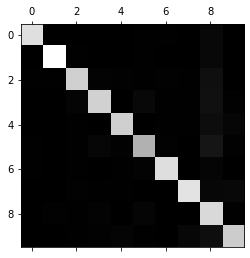

In [54]:
plt.matshow(conf_mx, cmap=plt.cm.gray)

you need to divide each value in the confusion
matrix by the number of images in the corresponding class, so you can compare error rates instead of absolute number of errors (which would make abundant classes look
unfairly bad):

In [62]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

In [63]:
row_sums

array([[5923],
       [6742],
       [5958],
       [6131],
       [5842],
       [5421],
       [5918],
       [6265],
       [5851],
       [5949]])

Now let’s fill the diagonal with zeros to keep only the errors, and let’s plot the result:

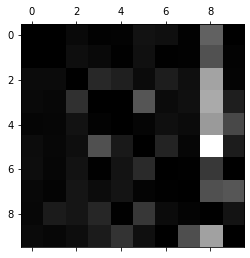

In [64]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

Remember that rows represent actual classes, while columns represent predicted classes. The column for
class 8 is quite bright, which tells you that many images get misclassified as 8s. However,
the row for class 8 is not that bad, telling you that actual 8s in general get properly
classified as 8s.

Analyzing the confusion matrix can often give you insights on ways to improve your
classifier. Looking at this plot, it seems that your efforts should be spent on reducing
the false 8s. For example, you could try to gather more training data for digits that
look like 8s (but are not) so the classifier can learn to distinguish them from real 8s.
Or you could engineer new features that would help the classifier—for example, writing
an algorithm to count the number of closed loops (e.g., 8 has two, 6 has one, 5 has
none). Or you could preprocess the images (e.g., using Scikit-Image, Pillow, or
OpenCV) to make some patterns stand out more, such as closed loops.

Analyzing individual errors can also be a good way to gain insights on what your
classifier is doing and why it is failing, but it is more difficult and time-consuming.
For example, let’s plot examples of 3s and 5s (the `plot_digits()` function just uses
Matplotlib’s `imshow()` function; see this chapter’s Jupyter notebook for details):

In [66]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

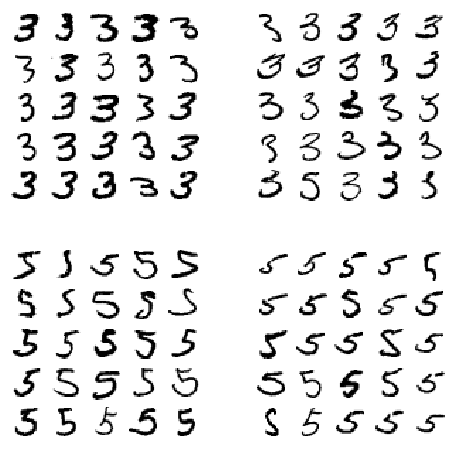

In [67]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)

The two 5×5 blocks on the left show digits classified as 3s, and the two 5×5 blocks on
the right show images classified as 5s. Some of the digits that the classifier gets wrong
(i.e., in the bottom-left and top-right blocks) are so badly written that even a human
would have trouble classifying them (e.g., the 5 on the 1st row and 2nd column truly
looks like a badly written 3). However, most misclassified images seem like obvious
errors to us, and it’s hard to understand why the classifier made the mistakes it did.

The reason is that we used a simple SGDClassifier, which is a linear model. All it
does is assign a weight per class to each pixel, and when it sees a new image it just
sums up the weighted pixel intensities to get a score for each class. So since 3s and 5s
differ only by a few pixels, this model will easily confuse them.